<a href="https://colab.research.google.com/github/vikram0050/Card-Default-Prediction/blob/main/Vikramaditya_sah_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing lbrary 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pip install --upgrade pandas

In [ ]:
pip install --upgrade xlrd

In [ ]:
data='/content/drive/MyDrive/Credit Card Default Prediction - Vikramaditya sah/default of credit card clients.xls'

In [ ]:
pd.read_excel(data)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
#reading data
df=pd.read_excel(data,header=1)

#Data inspection

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulters,multivariate_anomaly_score,multivariate_outlier,age_group
0,20000,2,2,1,2,2,-1,-1,-2,-2,...,0,689,0,0,0,0,1,0.190476,1,21-30
1,120000,2,2,2,-1,2,0,0,0,2,...,0,1000,1000,1000,0,2000,1,0.212437,1,21-30
2,90000,2,2,2,0,0,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,0.269715,1,31-40
3,50000,2,2,1,0,0,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,0.264108,1,31-40
4,50000,1,2,1,-1,0,-1,0,0,0,...,2000,36681,10000,9000,689,679,0,0.171549,1,51-60


In [ ]:
df.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulters,multivariate_anomaly_score,multivariate_outlier,age_group
29995,220000,1,3,1,0,0,0,0,0,0,...,8500,20000,5003,3047,5000,1000,0,0.162817,1,31-40
29996,150000,1,3,2,-1,-1,-1,-1,0,0,...,1837,3526,8998,129,0,0,0,0.223654,1,41-50
29997,30000,1,2,2,4,3,2,-1,0,0,...,0,0,22000,4200,2000,3100,1,0.157944,1,31-40
29998,80000,1,3,1,1,-1,0,0,0,-1,...,85900,3409,1178,1926,52964,1804,1,0.151458,1,41-50
29999,50000,1,2,1,0,0,0,0,0,0,...,2078,1800,1430,1000,1000,1000,1,0.247573,1,41-50


In [ ]:
#checking information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
#checking null values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Surprisingly,We didn't have any of the missing and null values in the dataset.So,there is no needed for the null value treatment in the datase

In [ ]:
#describing data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [ ]:
#checking 1st Row
df.iloc[0,:]

ID                                1
LIMIT_BAL                     20000
SEX                               2
EDUCATION                         2
MARRIAGE                          1
AGE                              24
PAY_0                             2
PAY_2                             2
PAY_3                            -1
PAY_4                            -1
PAY_5                            -2
PAY_6                            -2
BILL_AMT1                      3913
BILL_AMT2                      3102
BILL_AMT3                       689
BILL_AMT4                         0
BILL_AMT5                         0
BILL_AMT6                         0
PAY_AMT1                          0
PAY_AMT2                        689
PAY_AMT3                          0
PAY_AMT4                          0
PAY_AMT5                          0
PAY_AMT6                          0
default payment next month        1
Name: 0, dtype: int64

In [ ]:
#droping Id Column since its is unique for every row
df=df.drop('ID',axis=1)

In [ ]:
#viewing Data
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
#viewing table
df.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,50000,1,2,1,46,0,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


#Data cleaning

In [ ]:
df['LIMIT_BAL'].max()

1000000

In [ ]:
df['LIMIT_BAL'].min()

10000

In [ ]:
#renaming dependendent Variable
df.rename(columns={'default payment next month' : 'Defaulters'}, inplace=True)

In [ ]:
# renaming some feature name for better understanding of feature
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)

df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)

df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulters
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Looking for Outlier Using Isolation Forest

In [ ]:
# importing minmax scaler
from sklearn.preprocessing import MinMaxScaler
#creating instance of minmaxscaler
minmax = MinMaxScaler(feature_range=(0, 1))
scale_df = minmax.fit_transform(df.drop('Defaulters',axis=1))

In [ ]:
#imprting IsolationForeest for outlier detection
from sklearn.ensemble import IsolationForest

In [ ]:
#creating instance of isolation forest
clf = IsolationForest(n_estimators=100, contamination=0.01, random_state=0)
clf.fit(scale_df)

# predict raw anomaly score
df['multivariate_anomaly_score'] = clf.decision_function(scale_df)
         
# prediction of a datapoint category outlier or inlier
df['multivariate_outlier'] = clf.predict(scale_df)

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulters,multivariate_anomaly_score,multivariate_outlier
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,689,0,0,0,0,1,0.190476,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3261,0,1000,1000,1000,0,2000,1,0.212437,1
2,90000,2,2,2,34,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0.269715,1
3,50000,2,2,1,37,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0.264108,1
4,50000,1,2,1,57,-1,0,-1,0,0,...,19131,2000,36681,10000,9000,689,679,0,0.171549,1


In [ ]:
#looking the outlier
df[(df['multivariate_outlier'] == -1)]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulters,multivariate_anomaly_score,multivariate_outlier
6,500000,1,1,2,29,0,0,0,0,0,...,473944,55000,40000,38000,20239,13750,13770,0,-0.051680,-1
59,400000,2,2,1,29,0,0,0,0,0,...,364089,17000,15029,30000,12000,12000,23000,0,-0.015094,-1
102,480000,1,1,1,63,0,0,0,2,2,...,469961,16078,55693,17000,0,18000,24200,0,-0.078952,-1
214,470000,1,2,2,27,2,2,2,2,0,...,309959,13000,11001,0,10484,10838,10367,0,-0.024130,-1
360,500000,2,2,2,23,4,3,2,0,0,...,419643,10000,0,14000,16500,16000,19000,1,-0.073918,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29605,500000,1,1,1,37,0,0,2,0,0,...,356636,40024,325,15296,12137,12312,14113,0,-0.047464,-1
29820,400000,1,2,2,37,1,-1,0,0,0,...,271385,423903,15100,14600,13000,9500,9500,0,-0.057618,-1
29837,500000,1,1,2,34,0,0,0,0,0,...,424592,17438,18852,16673,15244,15216,16037,0,-0.032132,-1
29883,420000,1,1,1,34,0,0,0,0,0,...,489200,20000,24000,11000,10000,0,11000,0,-0.028768,-1


In [ ]:
#removing Outliers
df=df.drop( df[ df['multivariate_outlier'] == -1 ].index) 

In [ ]:
#checking the shape of df after removing outlier
df.shape

(29700, 26)

#Exploratory Data Analysis(EDA) and feature Engineering

In [ ]:
#checking dependent valriable
df['Defaulters'].value_counts()

0    23154
1     6546
Name: Defaulters, dtype: int64

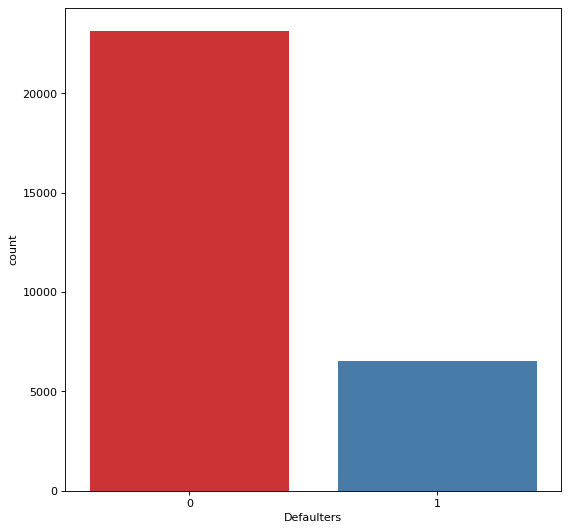

In [ ]:
#visualizing dependent variable
plt.figure(figsize=(8,8),dpi=80)
sns.countplot(x='Defaulters',data=df,palette='Set1')

We can see that we have quite imbalance dataset

#Bivariate Analysis

In [ ]:
#analysing categorical variable
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

#creating different df for categorical variable
df_cat = df[categorical_features]

#checking shape of categorical variable
df_cat.shape



(29700, 3)

In [ ]:
#looking into categorical df
df_cat.head()

,SEX,EDUCATION,MARRIAGE
0,2,2,1
1,2,2,2
2,2,2,2
3,2,2,1
4,1,2,1


In [ ]:
#checking value counts of categorical_features
for column_name in df_cat.columns:
  print(f'count of {column_name} features')
  print(f'\n{df_cat[column_name].value_counts()}\n')

count of SEX features

2    17963
1    11737
Name: SEX, dtype: int64

count of EDUCATION features

2    13922
1    10437
3     4885
5      271
4      123
6       48
0       14
Name: EDUCATION, dtype: int64

count of MARRIAGE features

2    15838
1    13486
3      322
0       54
Name: MARRIAGE, dtype: int64



In [ ]:
#maping numerical value to categorical for easy understanding
df_cat['SEX']=df_cat['SEX'].map({1:'Male',2:'Female'})
df_cat['EDUCATION']=df_cat['EDUCATION'].map({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'other',5:'other',6:'other',0:'other'})
df_cat['MARRIAGE']=df_cat['MARRIAGE'].map({1 : 'married', 2 : 'single', 3 : 'others',0 : 'others'})

df_cat.head()



,SEX,EDUCATION,MARRIAGE
0,Female,university,married
1,Female,university,single
2,Female,university,single
3,Female,university,married
4,Male,university,married


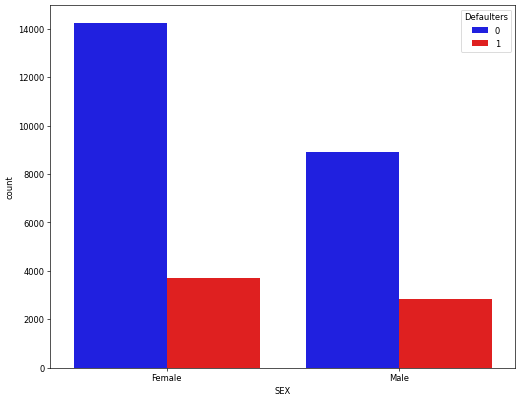

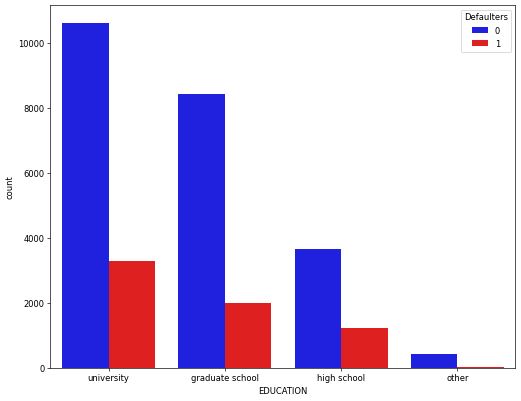

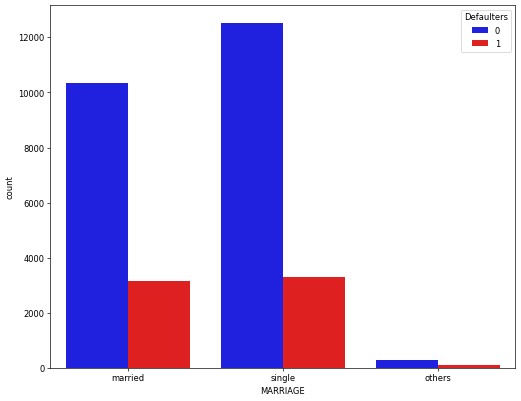

In [ ]:
#ploting count plot of  categorical df
for column_name in df_cat.columns:
  plt.figure(figsize=(10,8),dpi=60)
  sns.countplot(x=column_name,data=df_cat,hue=df['Defaulters'],palette=["blue",'red'])
  plt.show()

In [ ]:
#checking value counts of categorical_features
for column_name in df_cat.columns:
  print(f'count of {column_name} features')
  print(f'\n{df_cat[column_name].value_counts()}\n')

count of SEX features

Female    17963
Male      11737
Name: SEX, dtype: int64

count of EDUCATION features

university         13922
graduate school    10437
high school         4885
other                456
Name: EDUCATION, dtype: int64

count of MARRIAGE features

single     15838
married    13486
others       376
Name: MARRIAGE, dtype: int64



In [ ]:
#creating defaulter variable on df_cat
df_cat['Defaulter'] = df['Defaulters']

df_cat.head()

,SEX,EDUCATION,MARRIAGE,Defaulter
0,Female,university,married,1
1,Female,university,single,1
2,Female,university,single,0
3,Female,university,married,0
4,Male,university,married,0


In [ ]:
#checking the defaulter ratio of categories
for column_name in df_cat.columns[:-1]:
  print(df_cat[['Defaulter',column_name]].groupby(column_name).mean().reset_index())

      SEX  Defaulter
0  Female   0.206981
1    Male   0.240947
         EDUCATION  Defaulter
0  graduate school   0.191722
1      high school   0.251382
2            other   0.070175
3       university   0.235957
  MARRIAGE  Defaulter
0  married   0.233872
1   others   0.236702
2   single   0.208549


**OBSERAVATION**

for sex feature:
we can see that number of females are more than the males
but the default ratio of male is quite higher than female

for Education feature:


university and High School pesons are more likely to be defaulter in comparison with the graduate school persons.

for Marriage feature:



people who are not married nor single are more likely to make default of bills in comparison with single and married person

In [ ]:
#desribing age variable
df['AGE'].describe()

count    29700.000000
mean        35.435455
std          9.198810
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         75.000000
Name: AGE, dtype: float64

observation



we can see here min age is 21 and maximum age is 79 in our dataset

In [ ]:
# creating function to create the cohort for age group
def age_cohort(age):
  if age in range(21,31) : # starting from 21 because minimum age is 21 in our dataset
    return '21-30'
  elif age in range(31,41) :
    return '31-40'
  elif age in range(41,51) :
    return '41-50'
  elif age in range(51,61) :
    return '51-60'
  else:
    return '60 & above'

#creating age_group column in our data set
df['age_group']=df['AGE'].apply(lambda x: age_cohort(x))

df.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulters,multivariate_anomaly_score,multivariate_outlier,age_group
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,689,0,0,0,0,1,0.190476,1,21-30
1,120000,2,2,2,26,-1,2,0,0,0,...,0,1000,1000,1000,0,2000,1,0.212437,1,21-30
2,90000,2,2,2,34,0,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,0.269715,1,31-40
3,50000,2,2,1,37,0,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,0.264108,1,31-40
4,50000,1,2,1,57,-1,0,-1,0,0,...,2000,36681,10000,9000,689,679,0,0.171549,1,51-60


In [ ]:
#cheacking the count of age_group
df['age_group'].value_counts().sort_values(ascending=False)

21-30         10962
31-40         10606
41-50          5908
51-60          1966
60 & above      258
Name: age_group, dtype: int64

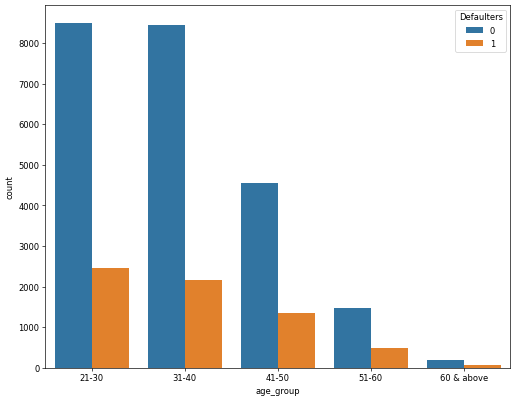

In [ ]:
#visualizing age group
plt.figure(figsize=(10,8),dpi=60)
sns.countplot(x=df['age_group'].sort_values(),data=df,hue='Defaulters')

observation:

In aur dataset we can clearly see that most of the credit card holder are of age between 21 to 40 , so we can say that company's target customer are mostly youngster.

In [ ]:
#checking the dedfault ratio of age_group
df[['Defaulters','age_group']].groupby('age_group').mean().reset_index()

,age_group,Defaulters
0,21-30,0.224229
1,31-40,0.203564
2,41-50,0.230366
3,51-60,0.252798
4,60 & above,0.275194


observation 
we can clearly see that as the age incearse , chances of the default increase as higher age persons has more default ratio.

In [ ]:
# drop age column because now we have age_group in our dataset
df=df.drop('AGE',axis=1)

df.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulters,multivariate_anomaly_score,multivariate_outlier,age_group
0,20000,2,2,1,2,2,-1,-1,-2,-2,...,0,689,0,0,0,0,1,0.190476,1,21-30
1,120000,2,2,2,-1,2,0,0,0,2,...,0,1000,1000,1000,0,2000,1,0.212437,1,21-30
2,90000,2,2,2,0,0,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,0.269715,1,31-40
3,50000,2,2,1,0,0,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,0.264108,1,31-40
4,50000,1,2,1,-1,0,-1,0,0,0,...,2000,36681,10000,9000,689,679,0,0.171549,1,51-60


In [ ]:
# Payment delay description
df[['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']].describe()

,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR
count,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000
mean,-0.023266,-0.140572,-0.172492,-0.226296,-0.271549,-0.296498
std,1.113858,1.189198,1.192044,1.166326,1.131761,1.148976
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [ ]:
#Previous Payment Description
df[['PAY_AMT_SEPT','PAY_AMT_AUG','PAY_AMT_JUL','PAY_AMT_JUN','PAY_AMT_MAY','PAY_AMT_APR']].describe()

,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
count,29700.000000,2.970000e+04,29700.000000,29700.000000,29700.000000,29700.000000
mean,5358.378047,5.406675e+03,4904.933434,4599.478047,4561.223973,4826.430943
std,14280.856685,1.613122e+04,14758.116252,14559.000559,14159.246540,15665.870251
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,990.000000,8.157500e+02,390.000000,283.750000,237.750000,100.000000
50%,2100.000000,2.000000e+03,1791.000000,1500.000000,1500.000000,1500.000000
75%,5000.000000,5.000000e+03,4360.000000,4000.000000,4000.000000,4000.000000
max,505000.000000,1.024516e+06,417588.000000,528897.000000,426529.000000,528666.000000


In [ ]:
# Bill Statement description
df[['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR']].describe()

,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR
count,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000
mean,48179.994916,46164.947912,43873.935421,40258.277104,37494.355690,36265.737104
std,65642.197006,62954.356763,60427.570373,55956.697295,52716.217836,52097.663795
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3457.750000,2895.500000,2551.000000,2250.000000,1699.750000,1200.000000
50%,21706.000000,20650.000000,19779.500000,18783.000000,17860.000000,16703.500000
75%,64829.000000,61729.750000,58425.500000,52032.000000,49123.750000,48278.500000
max,746814.000000,512650.000000,855086.000000,628699.000000,514114.000000,499100.000000


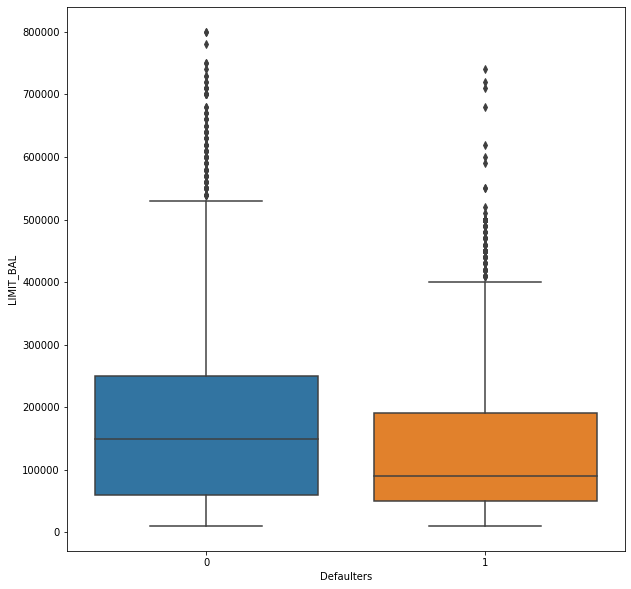

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Defaulters", y="LIMIT_BAL", data=df)

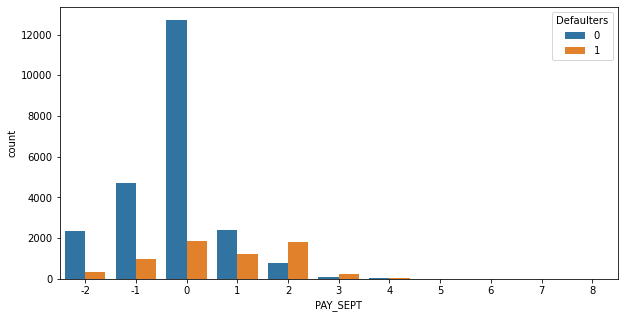

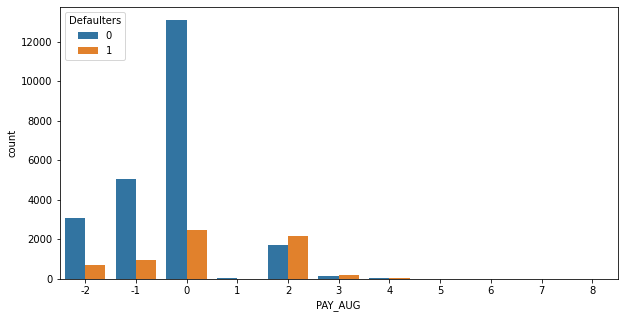

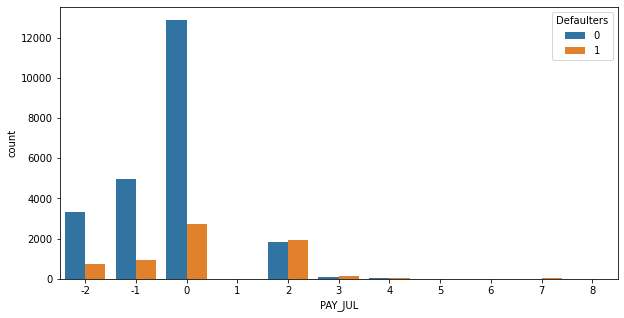

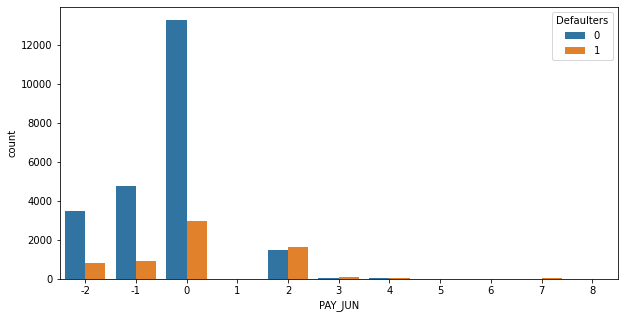

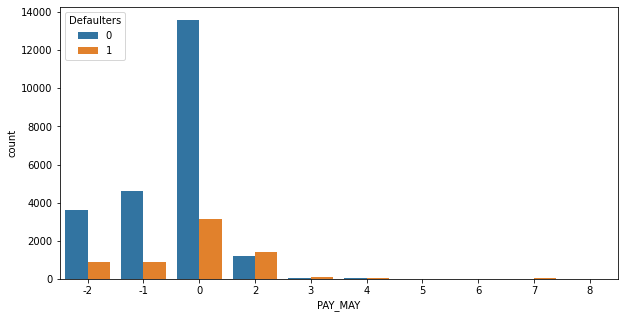

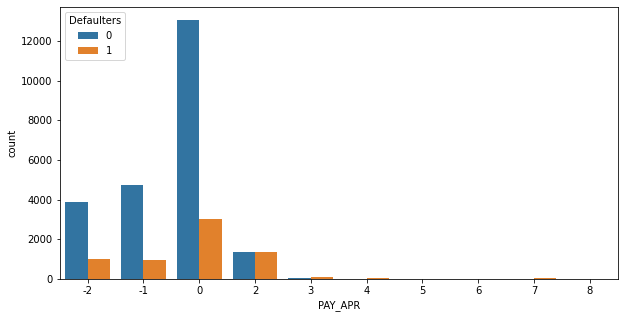

In [ ]:
pay_col = ['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'Defaulters', data = df)

In [ ]:
# checking info of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29700 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   29700 non-null  int64  
 1   SEX                         29700 non-null  int64  
 2   EDUCATION                   29700 non-null  int64  
 3   MARRIAGE                    29700 non-null  int64  
 4   PAY_SEPT                    29700 non-null  int64  
 5   PAY_AUG                     29700 non-null  int64  
 6   PAY_JUL                     29700 non-null  int64  
 7   PAY_JUN                     29700 non-null  int64  
 8   PAY_MAY                     29700 non-null  int64  
 9   PAY_APR                     29700 non-null  int64  
 10  BILL_AMT_SEPT               29700 non-null  int64  
 11  BILL_AMT_AUG                29700 non-null  int64  
 12  BILL_AMT_JUL                29700 non-null  int64  
 13  BILL_AMT_JUN                297

**Using (Synthetic Minority Oversampling Technique)SMOTE to remediate Imbalance in dependent column**

In [ ]:
#spliting independent Variable
X=df.drop(['Defaulters','multivariate_anomaly_score','multivariate_outlier'],axis=1)

#looking into independent variable
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,age_group
0,20000,2,2,1,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,21-30
1,120000,2,2,2,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,21-30
2,90000,2,2,2,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,31-40
3,50000,2,2,1,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,31-40
4,50000,1,2,1,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,51-60


In [ ]:
#maping OF numerical value to categorical for easy understanding
X['SEX']=X['SEX'].map({1:'Male',2:'Female'})
X['EDUCATION']=X['EDUCATION'].map({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'other',5:'other',6:'other',0:'other'})
X['MARRIAGE']=X['MARRIAGE'].map({1 : 'married', 2 : 'single', 3 : 'others',0 : 'others'})

X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,age_group
0,20000,Female,university,married,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,21-30
1,120000,Female,university,single,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,21-30
2,90000,Female,university,single,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,31-40
3,50000,Female,university,married,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,31-40
4,50000,Male,university,married,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,51-60


In [ ]:
# one hot encoding for age group
X=pd.get_dummies(X)

X.head()

,LIMIT_BAL,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,...,EDUCATION_other,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single,age_group_21-30,age_group_31-40,age_group_41-50,age_group_51-60,age_group_60 & above
0,20000,2,2,-1,-1,-2,-2,3913,3102,689,...,0,1,1,0,0,1,0,0,0,0
1,120000,-1,2,0,0,0,2,2682,1725,2682,...,0,1,0,0,1,1,0,0,0,0
2,90000,0,0,0,0,0,0,29239,14027,13559,...,0,1,0,0,1,0,1,0,0,0
3,50000,0,0,0,0,0,0,46990,48233,49291,...,0,1,1,0,0,0,1,0,0,0
4,50000,-1,0,-1,0,0,0,8617,5670,35835,...,0,1,1,0,0,0,0,0,1,0


In [ ]:
#spliting Dependent variable
y=df['Defaulters']

df_final=X.copy()

df_final.head()

,LIMIT_BAL,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,...,EDUCATION_other,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single,age_group_21-30,age_group_31-40,age_group_41-50,age_group_51-60,age_group_60 & above
0,20000,2,2,-1,-1,-2,-2,3913,3102,689,...,0,1,1,0,0,1,0,0,0,0
1,120000,-1,2,0,0,0,2,2682,1725,2682,...,0,1,0,0,1,1,0,0,0,0
2,90000,0,0,0,0,0,0,29239,14027,13559,...,0,1,0,0,1,0,1,0,0,0
3,50000,0,0,0,0,0,0,46990,48233,49291,...,0,1,1,0,0,0,1,0,0,0
4,50000,-1,0,-1,0,0,0,8617,5670,35835,...,0,1,1,0,0,0,0,0,1,0


In [ ]:
df_final['Defaulters']=df['Defaulters']

df_final

,LIMIT_BAL,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,...,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single,age_group_21-30,age_group_31-40,age_group_41-50,age_group_51-60,age_group_60 & above,Defaulters
0,20000,2,2,-1,-1,-2,-2,3913,3102,689,...,1,1,0,0,1,0,0,0,0,1
1,120000,-1,2,0,0,0,2,2682,1725,2682,...,1,0,0,1,1,0,0,0,0,1
2,90000,0,0,0,0,0,0,29239,14027,13559,...,1,0,0,1,0,1,0,0,0,0
3,50000,0,0,0,0,0,0,46990,48233,49291,...,1,1,0,0,0,1,0,0,0,0
4,50000,-1,0,-1,0,0,0,8617,5670,35835,...,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,0,0,0,0,0,0,188948,192815,208365,...,0,1,0,0,0,1,0,0,0,0
29996,150000,-1,-1,-1,-1,0,0,1683,1828,3502,...,0,0,0,1,0,0,1,0,0,0
29997,30000,4,3,2,-1,0,0,3565,3356,2758,...,1,0,0,1,0,1,0,0,0,1
29998,80000,1,-1,0,0,0,-1,-1645,78379,76304,...,0,1,0,0,0,0,1,0,0,1


In [ ]:
#importing SMote to make our dataset balanced
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X,y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 29700
Resampled dataset shape 46308


In [ ]:
#now checking the count of dependent variaable after balancing
(unique, counts) = np.unique(y_smote, return_counts=True)
np.asarray((unique, counts)).T

array([[    0, 23154],
       [    1, 23154]])

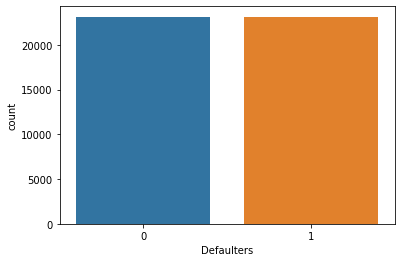

In [ ]:
sns.countplot(y_smote)

**Train | Test Split**

In [ ]:
#spliting data set into train and test dataset
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.25,random_state=101)

#looking into independent variable of train dataset
X_train

,LIMIT_BAL,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,...,EDUCATION_other,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single,age_group_21-30,age_group_31-40,age_group_41-50,age_group_51-60,age_group_60 & above
33806,100000,-1,-1,-1,-1,0,-1,6429,1716,2207,...,0,0,0,0,1,0,0,0,0,0
29971,50000,1,0,0,0,0,0,29637,30293,28937,...,0,1,0,0,0,0,0,0,0,0
453,180000,0,0,0,0,0,0,152510,151651,159019,...,0,1,1,0,0,0,1,0,0,0
21399,100000,1,2,0,0,0,2,7127,6867,8095,...,0,1,0,0,1,1,0,0,0,0
1652,290000,-1,-1,-1,-1,-1,0,1520,1200,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,30000,0,0,0,0,0,0,23819,15367,10159,...,0,1,1,0,0,0,1,0,0,0
8006,200000,-1,-1,0,0,0,0,1674,7398,6867,...,0,0,0,0,1,1,0,0,0,0
17745,10000,3,2,2,3,3,3,1050,1050,1050,...,0,1,1,0,0,0,1,0,0,0
17931,100000,0,0,0,0,0,0,81210,78785,69138,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
#Scaling Feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

**Creating Function**

In [ ]:
model_accuracy=[]
model_precision=[]
model_recall=[]
model_f1_score=[]
model_roc_auc_score=[]

In [ ]:
# Creating Function to run diferent models
def run_and_evaluate_model(model,X_train,X_test,y_train,y_test, best_parameter=True, best_score=True):
  '''
  train the model and gives mse,rmse,r2,adj r2 score of the model
  can be used for any model where y is not transformed 
  '''

  start=time.time()
  #training the model
  model.fit(X_train,y_train)
  stop = time.time()

  time_min=round((stop - start)/60,4)
  print(f"Training time: {time_min}min",'\n')
  


  #predicting the values of y from x via model
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  
  # Get the confusion matrix for both train and test
  from sklearn.metrics import confusion_matrix,classification_report

  def score (model,X,actual,predicted,append=True):
    accuracy = accuracy_score(actual,predicted)
    precision = precision_score(actual,predicted)
    recall = recall_score(actual,predicted)
    f1 = f1_score(actual,predicted)
    roc= roc_auc_score(actual,predicted)
    confusion_mat=confusion_matrix(actual,predicted)
    print("The accuracy is ", accuracy)
    print("The precision is ", precision)
    print("The recall is ", recall)
    print("The f1 is ", f1)
    print('the auc  is ',roc)
    print('\nconfusion_matrix \n ',confusion_mat)
    

    if append==True:
      model_accuracy.append(accuracy)
      model_precision.append(precision)
      model_recall.append(recall)
      model_f1_score.append(f1)
      model_roc_auc_score.append(roc)
    else:
      pass

  print('score matrix for train')
  print('*'*80)
  score(model=model,X=X_train,actual=y_train,predicted=y_pred_train,append=False)
  print('\nClassification Report\n')
  print(classification_report(y_train, y_pred_train))
  print('\n')
  print('score matrix for test')
  print('*'*80)
  score(model=model,X=X_test,actual=y_test,predicted=y_pred_test)
  print('\nClassification Report\n')
  print(classification_report(y_test, y_pred_test))

In [ ]:
pip install lime

In [ ]:
#importing lime 
import lime
import lime.lime_tabular

# LIME SECTION

def LimeTabularExplainer_table(model,instance,num_features,dependent_var):
  # creating a data frame to store all the independent features
  X=df_final.drop(dependent_var,axis=1)
  # fetching all the features name from independent variable
  feature_names =list(X.columns)

  # setting up the lime tablular 
  explainer = lime.lime_tabular.LimeTabularExplainer(X.values,feature_names=feature_names,mode='classification')

  # selecting the instace to explain
  choosen_instance = X.reset_index(drop=True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, model.predict_proba, num_features=num_features)
  # showing the lime graph on the screen 
  exp.show_in_notebook(show_table=True)

**creating function to get feature importance**

In [ ]:
#creating function to get features importance of all the tree based model
def get_features_importance(optimal_model,X_train):
  imp_feat=pd.DataFrame(index=X.columns,data=optimal_model.feature_importances_,columns=['importance'])
  imp_feat=imp_feat[imp_feat['importance']>0]
  imp_feat=imp_feat.sort_values('importance')
  plt.figure(figsize=(15,5))
  print(f'==========================Features Importance============================\n\n {optimal_model}\
  \n=========================================================================\n') 
  sns.barplot(data=imp_feat,x=imp_feat.index,y='importance')
  plt.xticks(rotation=90);

#Logistic Regression

In [ ]:
# import Loggistic Regression
from sklearn.linear_model import LogisticRegression

#creating Instance of Logistic Regression

log_model= LogisticRegression()

#running and evaluating log_model using function ccreated
run_and_evaluate_model(log_model,scaled_X_train,scaled_X_test,y_train,y_test)

Training time: 0.0205min 

score matrix for train
********************************************************************************
The accuracy is  0.8667184935648268
The precision is  0.9545877802449682
The recall is  0.7693684332063272
The f1 is  0.8520282581593837
the auc  is  0.8664752442325507

confusion_matrix 
  [[16775   634]
 [ 3995 13327]]

Classification Report

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     17409
           1       0.95      0.77      0.85     17322

    accuracy                           0.87     34731
   macro avg       0.88      0.87      0.87     34731
weighted avg       0.88      0.87      0.87     34731



score matrix for test
********************************************************************************
The accuracy is  0.8649909302928219
The precision is  0.954245584166844
The recall is  0.7688614540466392
The f1 is  0.8515810464343367
the auc  is  0.8657188036116572

confusion_matrix 
  [[5

**Implementing GridSearch for Hyperparameter Tuning**

In [ ]:
# creating param dict for hyperparameter tuning
param_dict= {'C': [0.001,0.01,0.1,1,10,100],'penalty': ['l1', 'l2'],'max_iter':[1000]} 

#creating Grid model to perform grid search

grid_log_model = GridSearchCV(log_model, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall') 

#running and evaluating grid_log_model using function ccreated
run_and_evaluate_model(grid_log_model,scaled_X_train,scaled_X_test,y_train,y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Training time: 0.2112min 

score matrix for train
********************************************************************************
The accuracy is  0.8676398606432294
The precision is  0.950825480053851
The recall is  0.7746795981988223
The f1 is  0.8537617305551136
the auc  is  0.8674075801322103

confusion_matrix 
  [[16715   694]
 [ 3903 13419]]

Classification Report

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     17409
           1       0.95      0.77      0.85     17322

    accuracy                           0.87     34731
   macro avg       0.88      0.87      0.87     34731
weighted avg       0.88      0.87      0.87     34731



score matrix for test
********************************************************************************
The accuracy is  0.8658547119288243
The precision is  0.9514665541253429
The recall is  0.7731481481481481
The f1 is  0.853088638728

In [ ]:
#getting the coeficient of best estimator
grid_log_model.best_estimator_.coef_

array([[-5.76401906e-02,  5.70239296e-01,  1.21010609e-01,
         4.58623503e-02,  3.71589202e-02,  5.13722306e-02,
         1.39578003e-02, -2.76588344e-01,  3.19456792e-02,
         1.02166648e-01,  2.03807175e-02, -9.19967125e-04,
         1.41453948e-02, -1.59515414e-01, -2.01767805e-01,
        -4.69581712e-02, -5.90027086e-02, -5.93562723e-02,
        -7.28792375e-02, -1.25539311e+00, -1.14153493e+00,
        -1.12417254e+00, -8.92909918e-01, -3.65920234e-01,
        -1.26837069e+00, -1.07618232e+00, -2.31281113e-01,
        -1.18003979e+00, -1.29451643e+00, -1.24177075e+00,
        -9.77176090e-01, -5.98492076e-01, -1.95510142e-01]])

In [ ]:
optimal_log_model=grid_log_model.best_estimator_.coef_

#ccreating dataframe for feature imp
feature_importance = pd.DataFrame({'Features':X.columns, 'Importance':np.abs(optimal_log_model).ravel() })

#sorting the feat impt df by importance
imp_feat = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

imp_feat

,Features,Importance
28,age_group_21-30,1.294516
24,EDUCATION_university,1.268371
19,SEX_Female,1.255393
29,age_group_31-40,1.241771
27,MARRIAGE_single,1.180040
20,SEX_Male,1.141535
21,EDUCATION_graduate school,1.124173
25,MARRIAGE_married,1.076182
30,age_group_41-50,0.977176
22,EDUCATION_high school,0.892910


==========================Features Importance============================

 [[-5.76401906e-02  5.70239296e-01  1.21010609e-01  4.58623503e-02
   3.71589202e-02  5.13722306e-02  1.39578003e-02 -2.76588344e-01
   3.19456792e-02  1.02166648e-01  2.03807175e-02 -9.19967125e-04
   1.41453948e-02 -1.59515414e-01 -2.01767805e-01 -4.69581712e-02
  -5.90027086e-02 -5.93562723e-02 -7.28792375e-02 -1.25539311e+00
  -1.14153493e+00 -1.12417254e+00 -8.92909918e-01 -3.65920234e-01
  -1.26837069e+00 -1.07618232e+00 -2.31281113e-01 -1.18003979e+00
  -1.29451643e+00 -1.24177075e+00 -9.77176090e-01 -5.98492076e-01
  -1.95510142e-01]]



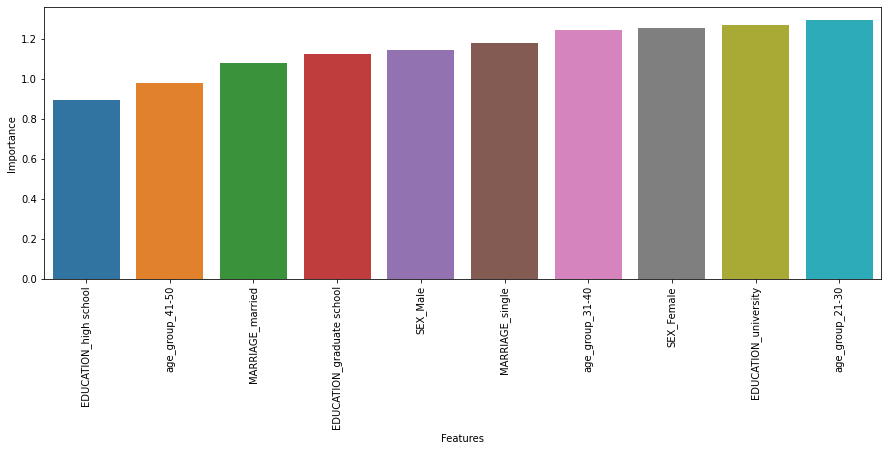

In [ ]:
#visualizing the feature importance
imp_feat=imp_feat[imp_feat['Importance']>0]
imp_feat=imp_feat.sort_values('Importance')
plt.figure(figsize=(15,5))
print(f'==========================Features Importance============================\n\n {optimal_log_model}\
\n=========================================================================\n') 
sns.barplot(data=imp_feat,x=imp_feat.Features,y='Importance')
plt.xticks(rotation=90);

In [ ]:
#geting the best Paramater of model
grid_log_model.best_params_

{'C': 0.01, 'max_iter': 1000, 'penalty': 'l2'}

#Decision Tree

In [ ]:
#impoting decisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# creating DecisionTree model
DecisionTree = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=45,criterion='entropy')

# training and evaluating the DecisionTree
run_and_evaluate_model(DecisionTree,X_train, X_test, y_train, y_test)

Training time: 0.0211min 

score matrix for train
********************************************************************************
The accuracy is  0.8294895050531226
The precision is  0.8918603052385535
The recall is  0.7489319939960744
The f1 is  0.8141709551901594
the auc  is  0.8292882153908225

confusion_matrix 
  [[15836  1573]
 [ 4349 12973]]

Classification Report

              precision    recall  f1-score   support

           0       0.78      0.91      0.84     17409
           1       0.89      0.75      0.81     17322

    accuracy                           0.83     34731
   macro avg       0.84      0.83      0.83     34731
weighted avg       0.84      0.83      0.83     34731



score matrix for test
********************************************************************************
The accuracy is  0.8266390256543146
The precision is  0.8886405202194676
The recall is  0.7498285322359396
The f1 is  0.813354412722031
the auc  is  0.8272206194687096

confusion_matrix 
  [[5

In [ ]:
DecisionTree.feature_importances_

array([0.00437338, 0.22690993, 0.09523552, 0.        , 0.00249025,
       0.        , 0.0171179 , 0.        , 0.00341848, 0.        ,
       0.        , 0.00809785, 0.        , 0.00710417, 0.02494231,
       0.00657533, 0.        , 0.        , 0.        , 0.01925515,
       0.12922323, 0.00867152, 0.02458811, 0.01699585, 0.00985045,
       0.25370679, 0.05863314, 0.05597431, 0.00579206, 0.00550944,
       0.00799565, 0.00753918, 0.        ])

==========================Features Importance============================

 DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=45)  



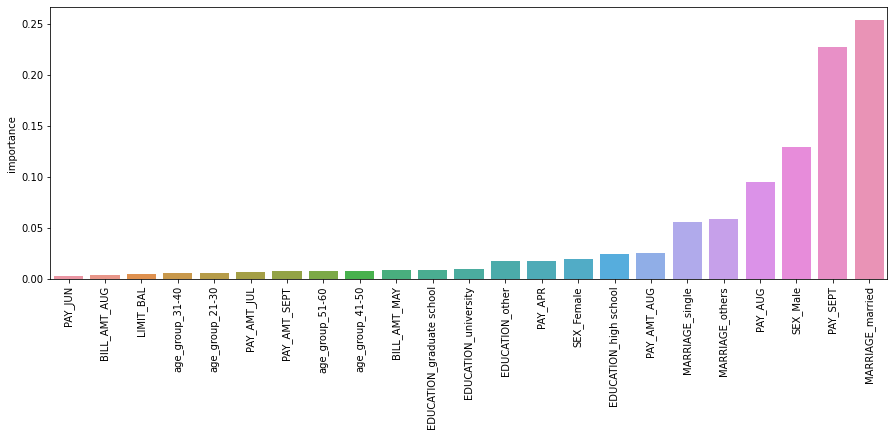

In [ ]:
get_features_importance(DecisionTree,X_train)

#Random Forest

In [ ]:
#importing Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier()

# training and evaluating the Random forest
run_and_evaluate_model(rfc_model,X_train, X_test, y_train, y_test)

Training time: 0.2717min 

score matrix for train
********************************************************************************
The accuracy is  0.9981284731219947
The precision is  0.9985554977754666
The recall is  0.99769079782935
The f1 is  0.998122960524416
the auc  is  0.9981273794994301

confusion_matrix 
  [[17384    25]
 [   40 17282]]

Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17409
           1       1.00      1.00      1.00     17322

    accuracy                           1.00     34731
   macro avg       1.00      1.00      1.00     34731
weighted avg       1.00      1.00      1.00     34731



score matrix for test
********************************************************************************
The accuracy is  0.8788114364688606
The precision is  0.9095616793046052
The recall is  0.843278463648834
The f1 is  0.8751668297891271
the auc  is  0.8790804850881245

confusion_matrix 
  [[5256

**Implementing gridsearch for hyperparameter tuning in Random Forest**

In [ ]:
# finding the best parameters for rfc_model by gridsearchcv
grid_values = {'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
grid_rfc_model = GridSearchCV(estimator=rfc_model,param_grid = grid_values, scoring='balanced_accuracy',cv=3,verbose=5,n_jobs=-1)


In [ ]:
# training and evaluating the Random forest with hyperparameter tuing
run_and_evaluate_model(grid_rfc_model,X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Training time: 2.7822min 

score matrix for train
********************************************************************************
The accuracy is  0.9433071319570413
The precision is  0.9850255891830416
The recall is  0.9000115460108532
The f1 is  0.94060152644122
the auc  is  0.943198948948904

confusion_matrix 
  [[17172   237]
 [ 1732 15590]]

Classification Report

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     17409
           1       0.99      0.90      0.94     17322

    accuracy                           0.94     34731
   macro avg       0.95      0.94      0.94     34731
weighted avg       0.95      0.94      0.94     34731



score matrix for test
********************************************************************************
The accuracy is  0.8714692925628401
The precision is  0.9076576576576577
The recall is  0.8292181069958847
The f1 is  0.866666666666666

In [ ]:
#getting the best paramater of random forest
grid_rfc_model.best_params_

{'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 150}

In [ ]:
#getting the best estimator for random forest
grid_rfc_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=150)

==========================Features Importance============================

 RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=150)  



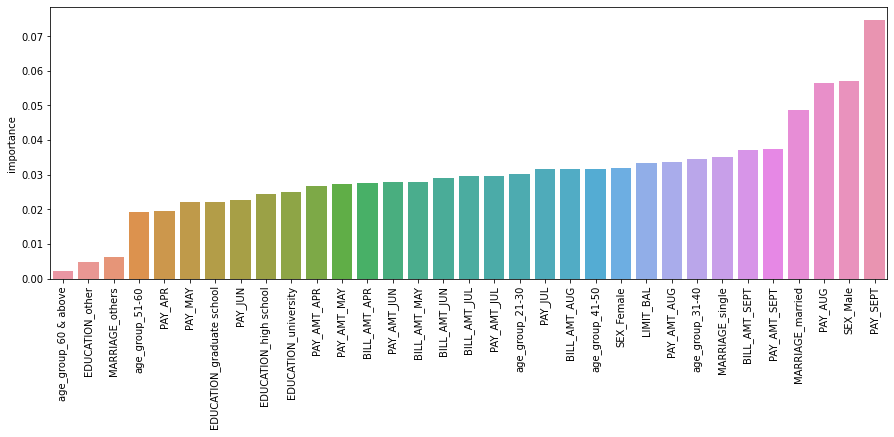

In [ ]:
#storing best estimator in varibale
optimal__rfc_model=grid_rfc_model.best_estimator_

#visualizing the feature importance of variable for random forest
get_features_importance(optimal__rfc_model,X_train)

#Support Vector Machine

In [ ]:
#importing SVM
from sklearn.svm import SVC
svc_model=SVC()

# training and evaluating the SVC model 
run_and_evaluate_model(svc_model,scaled_X_train,scaled_X_test,y_train,y_test)

Training time: 1.0699min 

score matrix for train
********************************************************************************
The accuracy is  0.8755578589732516
The precision is  0.9459997255386304
The recall is  0.7959242581688026
The f1 is  0.8644971156257838
the auc  is  0.8753588778924891

confusion_matrix 
  [[16622   787]
 [ 3535 13787]]

Classification Report

              precision    recall  f1-score   support

           0       0.82      0.95      0.88     17409
           1       0.95      0.80      0.86     17322

    accuracy                           0.88     34731
   macro avg       0.89      0.88      0.87     34731
weighted avg       0.89      0.88      0.87     34731



score matrix for test
********************************************************************************
The accuracy is  0.8683596786732314
The precision is  0.9417555373256767
The recall is  0.7873799725651578
The f1 is  0.8576765035487487
the auc  is  0.8689728409388017

confusion_matrix 
  [[

**Hyperparameter tuning for SVM**

In [ ]:
params={'C':[0.1,1,10],'kernel':['rbf']}
svc_grid_model= GridSearchCV(svc_model,param_grid=params,scoring='recall')
run_and_evaluate_model(svc_grid_model,scaled_X_train,scaled_X_test,y_train,y_test)

Training time: 13.1396min 

score matrix for train
********************************************************************************
The accuracy is  0.8915954046816965
The precision is  0.9536237703272435
The recall is  0.8226532732940769
The f1 is  0.8833100883310089
the auc  is  0.8914231384564474

confusion_matrix 
  [[16716   693]
 [ 3072 14250]]

Classification Report

              precision    recall  f1-score   support

           0       0.84      0.96      0.90     17409
           1       0.95      0.82      0.88     17322

    accuracy                           0.89     34731
   macro avg       0.90      0.89      0.89     34731
weighted avg       0.90      0.89      0.89     34731



score matrix for test
********************************************************************************
The accuracy is  0.8675822752008292
The precision is  0.9303303303303303
The recall is  0.7968106995884774
The f1 is  0.85840953172624
the auc  is  0.8681181435279202

confusion_matrix 
  [[5

In [ ]:
#getting the best estimator
svc_grid_model.best_estimator_

SVC(C=10)

In [ ]:
#getting the best parameter
svc_grid_model.best_params_

{'C': 10, 'kernel': 'rbf'}

In [ ]:
#creating dictionary to store all the metrices 
dict={'accuracy':model_accuracy,'precision':model_precision,'recall':model_recall,'f1':model_f1_score,'roc_auc':model_roc_auc_score}

# list of all models
model_name=['Logestic Regrestion','grid_log_regg','Desision Tree','Random forest','grid random forest','SVM','Grid SVM',]

# converting dictionary to dataframe
matrix_df=pd.DataFrame.from_dict(dict,orient="index",columns=model_name)

# taking the transpose of the dataframe to make it more visual appealing
matrix_df=matrix_df.transpose().reset_index().rename(columns={'index':'Models'})

matrix_df

,Models,accuracy,precision,recall,f1,roc_auc
0,Logestic Regrestion,0.864214,0.953771,0.767661,0.850656,0.864945
1,grid_log_regg,0.865509,0.950854,0.772977,0.852738,0.866210
2,Desision Tree,0.819902,0.893345,0.729595,0.803209,0.820585
3,Random forest,0.877861,0.909681,0.841049,0.874020,0.878140
4,grid random forest,0.872247,0.910273,0.828018,0.867199,0.872582
5,SVM,0.869655,0.941934,0.789952,0.859274,0.870259
6,Grid SVM,0.867582,0.930330,0.796811,0.858410,0.868118


#CONCLUSION
From the project we can conclude that the default rate is higher for males, increases as the education increases, and also increases as the age of a person increases. i.e clients whose age over 60 was higher than mid-age and young people. In all of these models, our recall revolves in the range of 76 to 84%.with the best fit model as random forest